In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import ImageGrab
import time

In [2]:
import torch
torch.cuda.is_available()

False

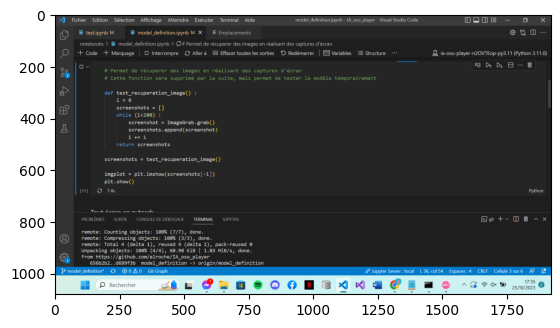

In [33]:
# Permet de récuperer des images en réalisant des captures d'écran
# Cette fonction sera supprimé par la suite, mais permet de tester le modèle temporairement 

def test_recuperation_image() :
    i = 0
    screenshots = []
    while (i<200) :
        screenshot = ImageGrab.grab()
        screenshots.append(screenshot)
        i += 1
    return screenshots

screenshots = test_recuperation_image()

imgplot = plt.imshow(screenshots[-1])
plt.show()

Tout écrire en pytorch

Application de conv2d (CNN) sur les images

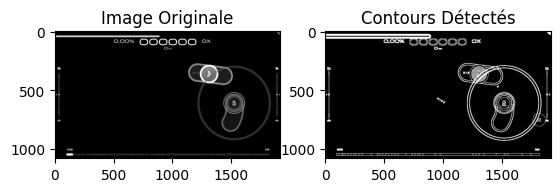

In [37]:
import torch.nn.functional as F
from PIL import Image

# Appel de la fonction de capture d'écran, et récupération de ces captures
screenshots = test_recuperation_image()

# Récupérer la dernière capture d'écran
image = screenshots[-1]

# Convertir en niveaux de gris
image_gray = image.convert("L")

# Convertir en un tableau NumPy
image_array = np.array(image_gray)

# Convertir en un tenseur PyTorch
image_tensor = torch.unsqueeze(torch.unsqueeze(torch.tensor(image_array, dtype=torch.float32), 0), 0)

# Définir un filtre pour la détection de contours (Sobel filter)
sobel_filter_x = torch.tensor([[1, 0, -1],
                               [2, 0, -2],
                               [1, 0, -1]], dtype=torch.float32).view(1, 1, 3, 3)

sobel_filter_y = torch.tensor([[1, 2, 1],
                               [0, 0, 0],
                               [-1, -2, -1]], dtype=torch.float32).view(1, 1, 3, 3)

# Appliquer conv2d pour détecter les contours en utilisant les filtres Sobel
contours_x = F.conv2d(image_tensor, sobel_filter_x, padding=1)  # Ajout de padding pour garder la même taille
contours_y = F.conv2d(image_tensor, sobel_filter_y, padding=1)

# Calculer le gradient du contour
gradient_magnitude = torch.sqrt(contours_x ** 2 + contours_y ** 2)

# Seuiller l'image pour obtenir des contours binaires
seuil = 0.5  # Vous pouvez ajuster ce seuil en fonction de votre capture d'écran
contours_binaires = (gradient_magnitude > seuil).float()

# Afficher l'image originale et les contours détectés
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(contours_binaires.squeeze().numpy(), cmap='gray')
plt.title('Contours Détectés')
plt.show()